In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [3]:
data = pd.read_csv(r'./depart_employes.csv', sep=";")
display(data.head())

,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,depart,promotion_5_dernieres_annees,Service,niveau_salaire
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Satisfaction                      14999 non-null  float64
 1   derniere_evaluation               14999 non-null  float64
 2   Nombre_de_projets                 14999 non-null  int64  
 3   Nombre_heures_mensuelles_moyenne  14999 non-null  int64  
 4   Temps_passe_dans_entreprise       14999 non-null  int64  
 5   Accident_du travail               14999 non-null  int64  
 6   depart                            14999 non-null  int64  
 7   promotion_5_dernieres_annees      14999 non-null  int64  
 8   Service                           14999 non-null  object 
 9   niveau_salaire                    14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# La variable cible Y doit être de type binaire pour la Régréssion Logistique
data["target"] = data["depart"].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Satisfaction                      14999 non-null  float64 
 1   derniere_evaluation               14999 non-null  float64 
 2   Nombre_de_projets                 14999 non-null  int64   
 3   Nombre_heures_mensuelles_moyenne  14999 non-null  int64   
 4   Temps_passe_dans_entreprise       14999 non-null  int64   
 5   Accident_du travail               14999 non-null  int64   
 6   depart                            14999 non-null  int64   
 7   promotion_5_dernieres_annees      14999 non-null  int64   
 8   Service                           14999 non-null  object  
 9   niveau_salaire                    14999 non-null  object  
 10  target                            14999 non-null  category
dtypes: category(1), float64(2), int64(6), object(2)
memory

In [7]:
data.describe()

,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,depart,promotion_5_dernieres_annees
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

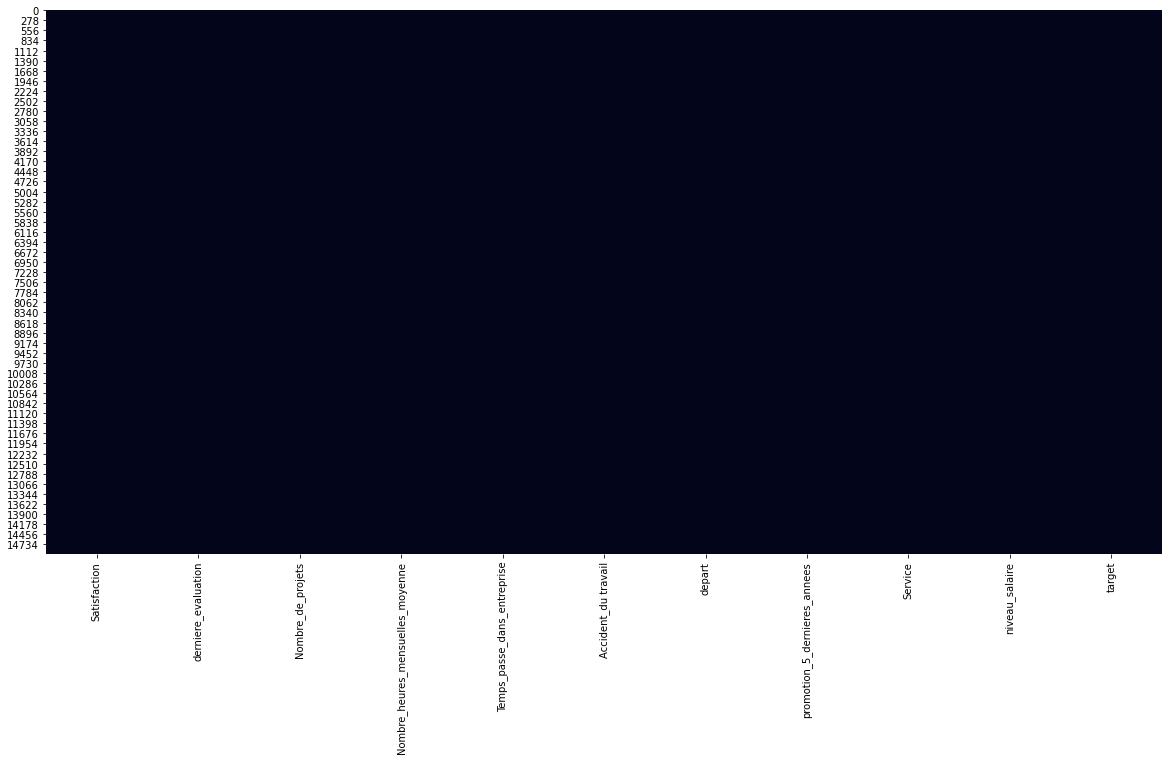

In [9]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

Aucune donnée manquante.

In [10]:
data.target.value_counts()

0    11428
1     3571
Name: target, dtype: int64

In [11]:
data_avec_target = data.copy()

In [12]:
data.drop("depart", axis=1,inplace=True)

In [17]:
data['target'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: target, dtype: float64

In [14]:
positive_data= data[data['target']==1]
negative_data= data[data['target']==0]

In [15]:
col=list(data.columns)[:-1]
col

num_cols=list(data.columns)[:-3]
cat_cols=list(data.columns)[-3:-1]

In [16]:
num_cols

['Satisfaction',
 'derniere_evaluation',
 'Nombre_de_projets',
 'Nombre_heures_mensuelles_moyenne',
 'Temps_passe_dans_entreprise',
 'Accident_du travail',
 'promotion_5_dernieres_annees']

In [17]:
cat_cols

['Service', 'niveau_salaire']

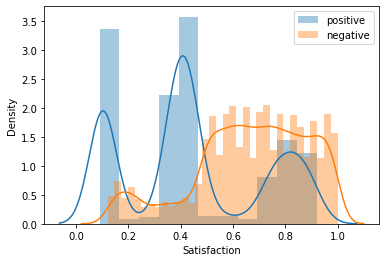

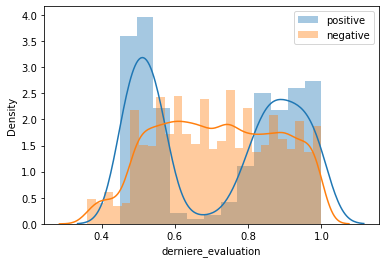

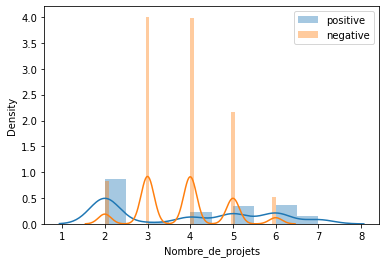

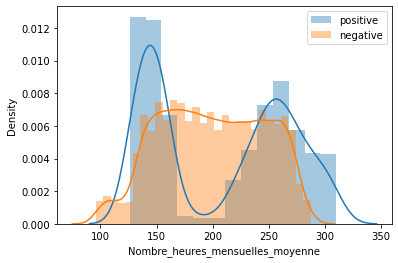

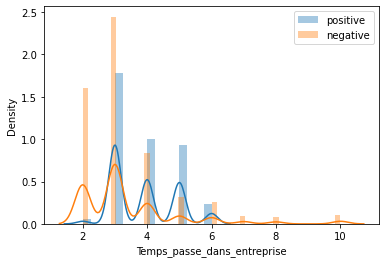

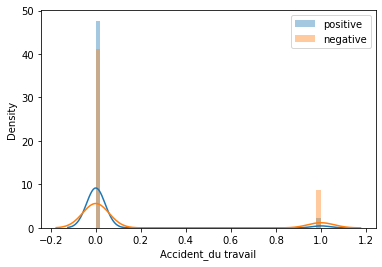

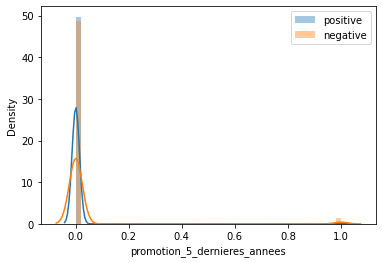

In [18]:
for e in num_cols:
    plt.figure()
    sns.distplot(positive_data[e], label='positive')
    sns.distplot(negative_data[e], label='negative')
    plt.legend()

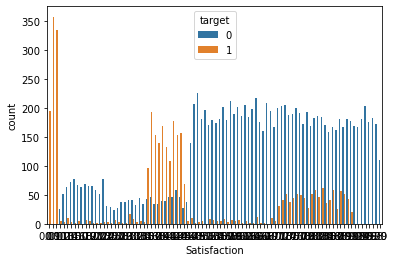

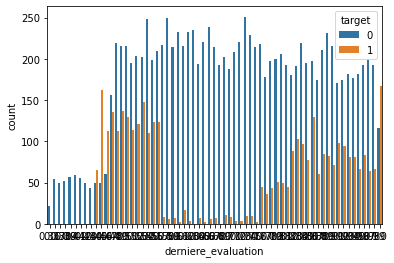

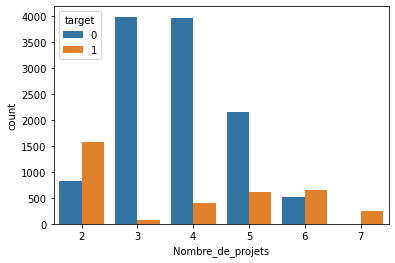

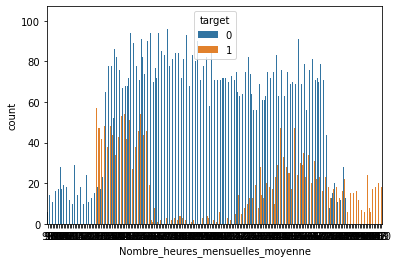

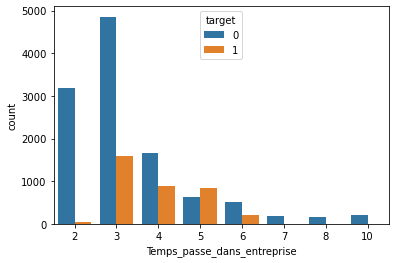

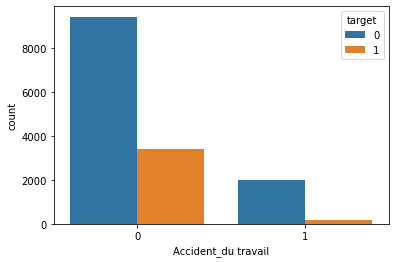

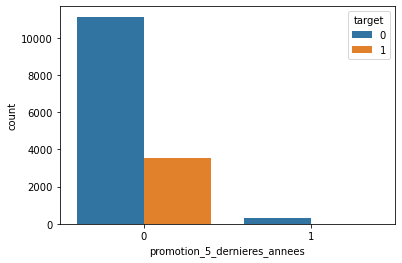

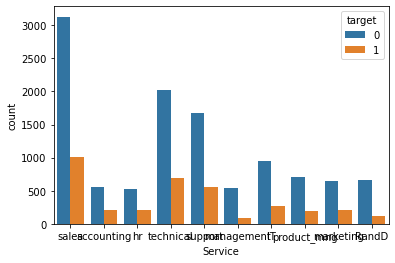

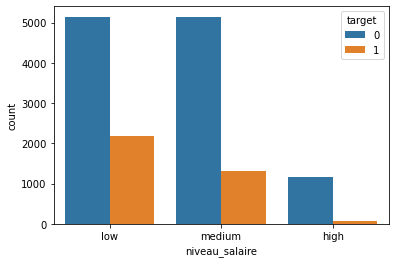

In [19]:
for e in col:
    plt.figure()
    sns.countplot(x=e, hue='target', data=data)

<AxesSubplot:>

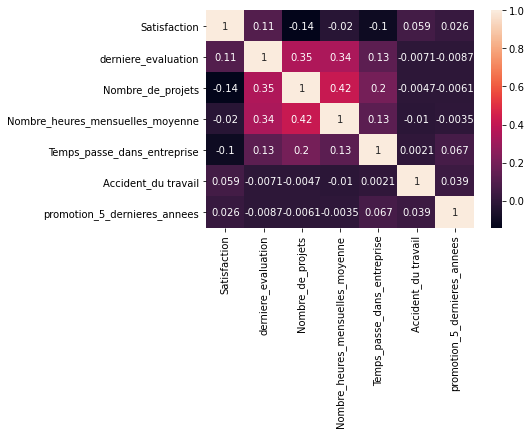

In [20]:
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:>

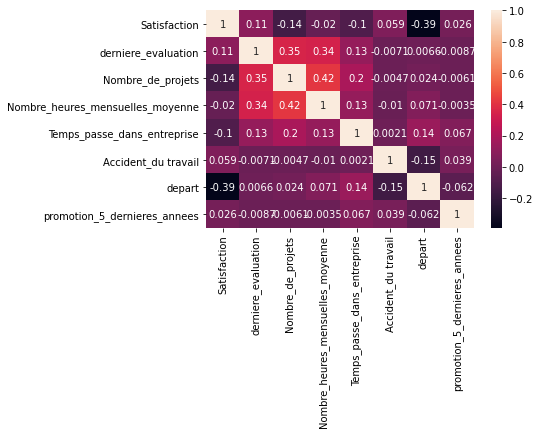

In [21]:
sns.heatmap(data_avec_target.corr(), annot = True)

# PRE-PROCESSING

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
df = MinMaxScaler().fit_transform(data[num_cols])
df=pd.DataFrame(df, columns=list(data[num_cols].columns))

df[cat_cols]=data[cat_cols]
df["target"]=data["target"]
df.head()

,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,promotion_5_dernieres_annees,Service,niveau_salaire,target
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,sales,low,1
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,sales,medium,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,sales,medium,1
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,sales,low,1
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,sales,low,1


In [23]:
df.columns

Index(['Satisfaction', 'derniere_evaluation', 'Nombre_de_projets',
       'Nombre_heures_mensuelles_moyenne', 'Temps_passe_dans_entreprise',
       'Accident_du travail', 'promotion_5_dernieres_annees', 'Service',
       'niveau_salaire', 'target'],
      dtype='object')

In [24]:
X = df[df.columns[:-1]] 
Y = df["target"]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify = df.target, train_size=0.8)

print("Train set: ", X_train.shape)
print("Test set: ", X_test.shape)

Train set:  (11999, 9)
Test set:  (3000, 9)


In [26]:
cat_cols

['Service', 'niveau_salaire']

In [27]:
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

transformer1 = LabelEncoder()
transformer1.fit(X_train['Service'])

transformer2 = LabelEncoder()
transformer2.fit(X_train['niveau_salaire'])


X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train['Service'] = transformer1.transform(X_train['Service'])
X_test['Service'] = transformer1.transform(X_test['Service'])

X_train['niveau_salaire'] = transformer2.transform(X_train['niveau_salaire'])
X_test['niveau_salaire'] = transformer2.transform(X_test['niveau_salaire'])

X_train.head()

,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,promotion_5_dernieres_annees,Service,niveau_salaire
12817,1.035596,-0.620304,-0.647551,-0.783650,-1.022515,-0.41128,-0.149407,1,1
4674,0.512482,0.254989,0.976775,1.079028,0.338004,-0.41128,-0.149407,7,2
11792,-0.211828,0.138283,-0.647551,1.279316,-0.342256,-0.41128,-0.149407,8,2
4917,0.874638,0.021578,0.164612,-0.803679,-0.342256,-0.41128,-0.149407,3,1
11803,0.069848,-0.620304,0.164612,-0.603391,-0.342256,-0.41128,-0.149407,7,1


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree

model_KNN = KNeighborsClassifier(3)
model_KNN.fit(X_train, Y_train)

model_RL = LogisticRegression(random_state=0)
model_RL.fit(X_train, Y_train)

model_SVG = svm.SVC()
model_SVG.fit(X_train, Y_train)

model_TREE = tree.DecisionTreeClassifier()
model_TREE.fit(X_train, Y_train)

model_RF = RandomForestClassifier(max_depth=2, random_state=0)
model_RF.fit(X_train, Y_train)

model=[model_KNN, model_RL, model_SVG, model_TREE, model_RF]

In [29]:
# Affichage des coéfficients
temp = pd.DataFrame(model_RL.coef_[0], index=data.columns[:-1], columns=['coef'])
temp

,coef
Satisfaction,-1.023082
derniere_evaluation,0.142753
Nombre_de_projets,-0.388173
Nombre_heures_mensuelles_moyenne,0.215168
Temps_passe_dans_entreprise,0.335061
Accident_du travail,-0.525035
promotion_5_dernieres_annees,-0.242935
Service,0.042051
niveau_salaire,0.011045


In [30]:
#On observe l'importance des variables grâce aux coéfficient ( QUE SI LES DONNEES SONT STANDARDISEE)
print(temp.sort_values(by="coef",ascending=False, key=lambda v: abs(v)))

                                      coef
Satisfaction                     -1.023082
Accident_du travail              -0.525035
Nombre_de_projets                -0.388173
Temps_passe_dans_entreprise       0.335061
promotion_5_dernieres_annees     -0.242935
Nombre_heures_mensuelles_moyenne  0.215168
derniere_evaluation               0.142753
Service                           0.042051
niveau_salaire                    0.011045


Evaluation sur l'échantillon test: Matrice de confusion

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import learning_curve

pred_KNN = model_KNN.predict(X_test)
pred_RL = model_RL.predict(X_test)
pred_SVM = model_SVG.predict(X_test)
pred_TREE = model_TREE.predict(X_test)
pred_RF = model_RF.predict(X_test)

pred_model={"pred_KNN":pred_KNN, "pred_RL":pred_RL, "pred_SVM":pred_SVM, "model_TREE": pred_TREE, "model_RF": pred_RF}

In [32]:
for e in list(pred_model.keys()):
    print(e)
    print(confusion_matrix(Y_test, pred_model[e]))
    print(classification_report(Y_test, pred_model[e]))
    print("\n")

pred_KNN
[[2186  100]
 [  38  676]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.87      0.95      0.91       714

    accuracy                           0.95      3000
   macro avg       0.93      0.95      0.94      3000
weighted avg       0.96      0.95      0.95      3000



pred_RL
[[2120  166]
 [ 531  183]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2286
           1       0.52      0.26      0.34       714

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.74      3000



pred_SVM
[[2206   80]
 [  77  637]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.89      0.89      0.89       714

    accuracy                           0.95      3000
   macro avg     

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.71s/it]


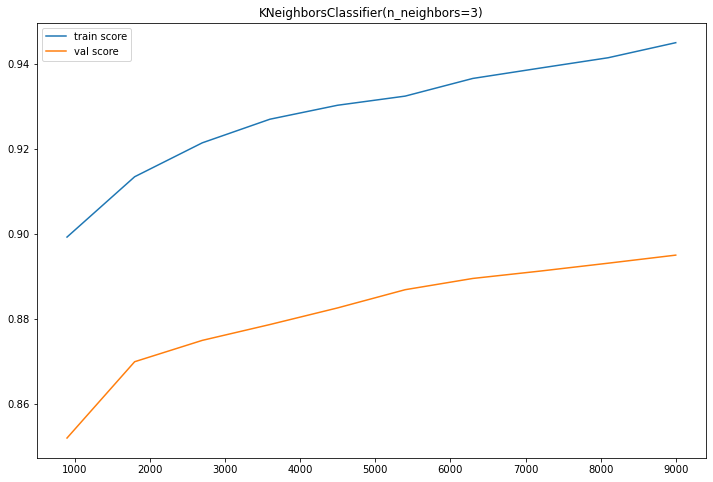

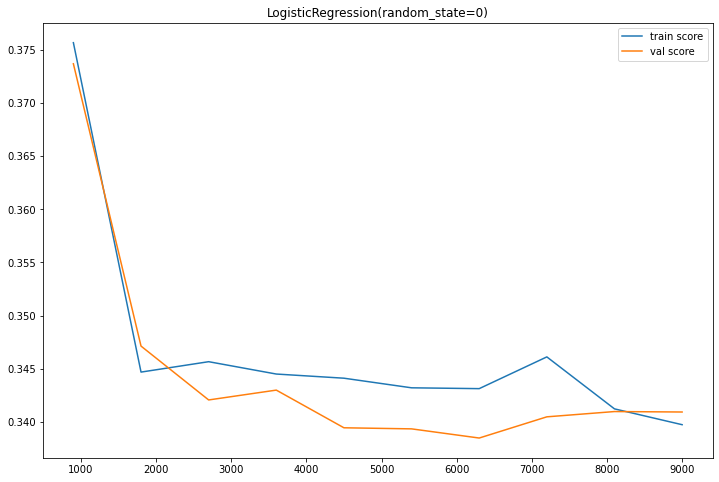

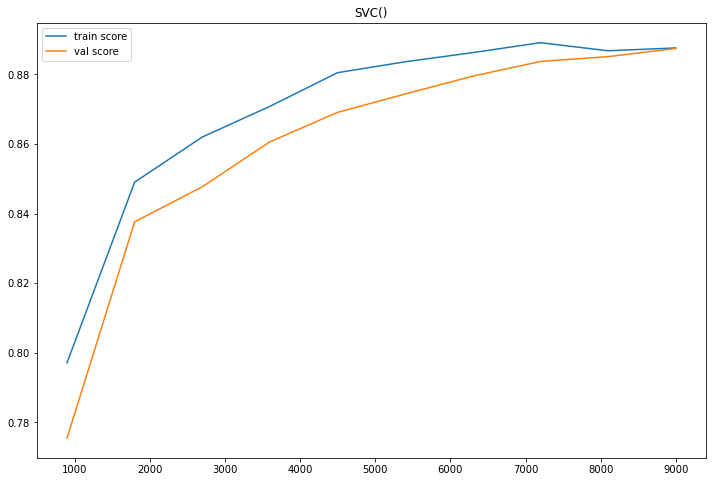

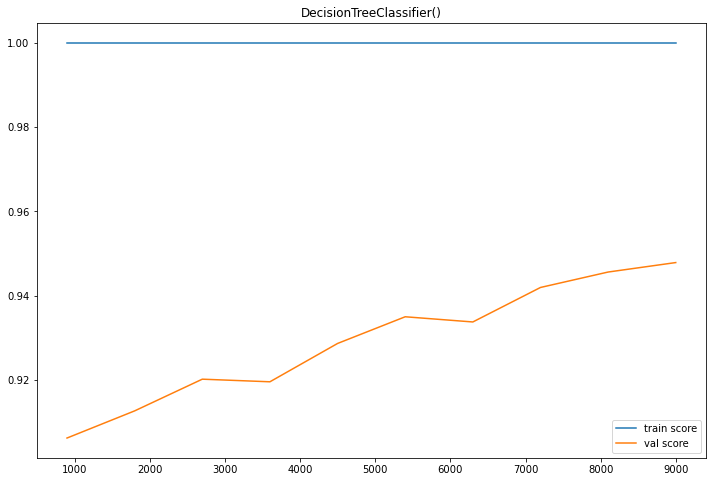

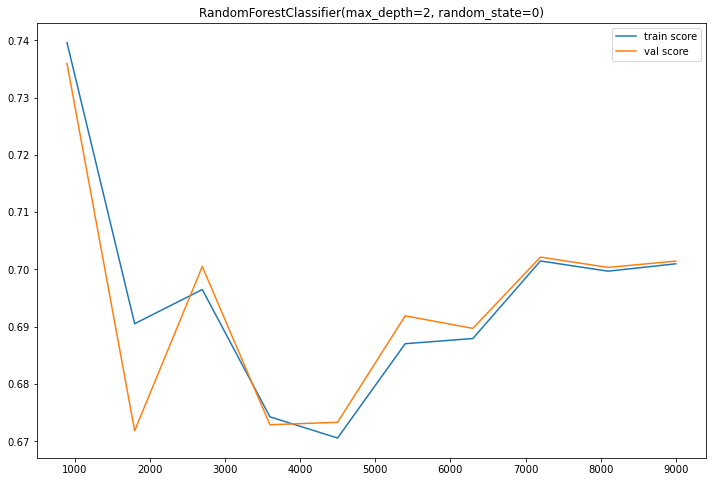

In [33]:
from tqdm import tqdm
for e in tqdm(model):
    N, train_score, val_score = learning_curve(e, X_train, Y_train, cv=4, scoring="f1", train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= "train score")
    plt.plot(N, val_score.mean(axis=1), label= "val score")
    plt.title(e)
    plt.legend()

Score des modèles

In [34]:
for e in model:
    print(e , "-->", e.score(X_test, Y_test))

KNeighborsClassifier(n_neighbors=3) --> 0.954
LogisticRegression(random_state=0) --> 0.7676666666666667
SVC() --> 0.9476666666666667
DecisionTreeClassifier() --> 0.9826666666666667
RandomForestClassifier(max_depth=2, random_state=0) --> 0.89


### ROC Curve

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

KNeighborsClassifier(n_neighbors=3)


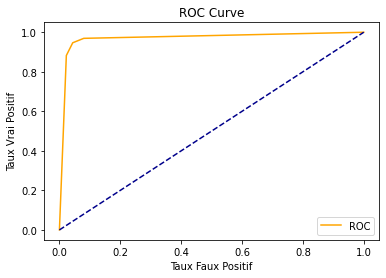

 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  4.55it/s]

LogisticRegression(random_state=0)


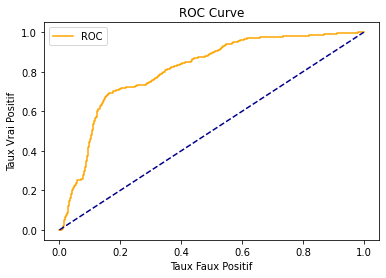

 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  5.92it/s]

SVC()


AttributeError: predict_proba is not available when  probability=False

In [41]:
for e in tqdm(model):
    print(e)
    probs = e.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(Y_test, probs) 
    
    
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taux Faux Positif')
    plt.ylabel('Taux Vrai Positif')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# TEST

In [ ]:
X_train.head()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

transformer1 = LabelEncoder()
transformer1.fit(X_train['Service'])

transformer2 = LabelEncoder()
transformer2.fit(X_train['niveau_salaire'])


X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train['Service'] = transformer1.transform(X_train['Service'])
X_test['Service'] = transformer1.transform(X_test['Service'])

X_train['niveau_salaire'] = transformer2.transform(X_train['niveau_salaire'])
X_test['niveau_salaire'] = transformer2.transform(X_test['niveau_salaire'])

In [ ]:
def depart(model, Satisfaction, derniere_evaluation, Nombre_de_projets, Nombre_heures_mensuelles_moyenne, Temps_passe_dans_entreprise, Accident_du_travail, promotion_5_dernieres_annees,Service, niveau_salaire):
    x = np.array([Satisfaction, derniere_evaluation, Nombre_de_projets
                  , Nombre_heures_mensuelles_moyenne, Temps_passe_dans_entreprise, Accident_du_travail
                  , promotion_5_dernieres_annees,Service, niveau_salaire]).reshape(1,9)
    print(model.predict(x))

depart(model[3],0.58,0.66,4,130,6,0,0,'sales','low')

